# Trabalho Computacional de Otimização
## Período 2022.2
---
O objetivo deste trabalho é analisar e implementar modelos de otimização para a minimização da função abaixo:

$$ f(x, y) = x^2 + (e^x - y)^2 \\
   (x, y) \in \mathbb{R}^2
$$

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
np.set_printoptions(suppress=True, precision=8, threshold=np.inf, linewidth=np.inf)
import matplotlib.pyplot as plt
%matplotlib notebook

import time
import pandas as pd

from nlp_irrestrito import OtimizacaoNLP

## 1. Estudo da Função
Como pode-se perceber no terceiro gráfico, a função não é convexa. Considerando que funções convexas possuem matriz hessiana **positiva definida** em todo seu domínio, nota-se que esse não é o caso aqui: a hessiana no ponto $(3, 40)$, por exemplo, é indefinida, pois tem autovalores positivos e negativos. 

Fazendo $\det(\nabla^2f(x,y) - \lambda I) = 0$ no ponto em questão obtemos $\lambda_1 = -34.8817$ e $\lambda_2 = 45.7539$, o que demonstra que a função não é convexa. [[1]](https://www.wolframalpha.com/input?i=%282-l%29%282+%2B+4e%5E%282x%29+-+2y*%28e%5Ex%29+-+l%29++-+4*e%5E%282x%29+%3D+0%2C+x+%3D+3%2C+y+%3D40)

A função possui apenas um ponto crítico em $(x, y) = (0, 1)$, pois esse é o único ponto que satisfaz $\nabla f(x,y) = 0$. Esse também é o ponto ótimo que minimiza a função.

A função dispara para valores de x muito positivos, se afastando muito rapidamente do ótimo nessa região.

<IPython.core.display.Javascript object>


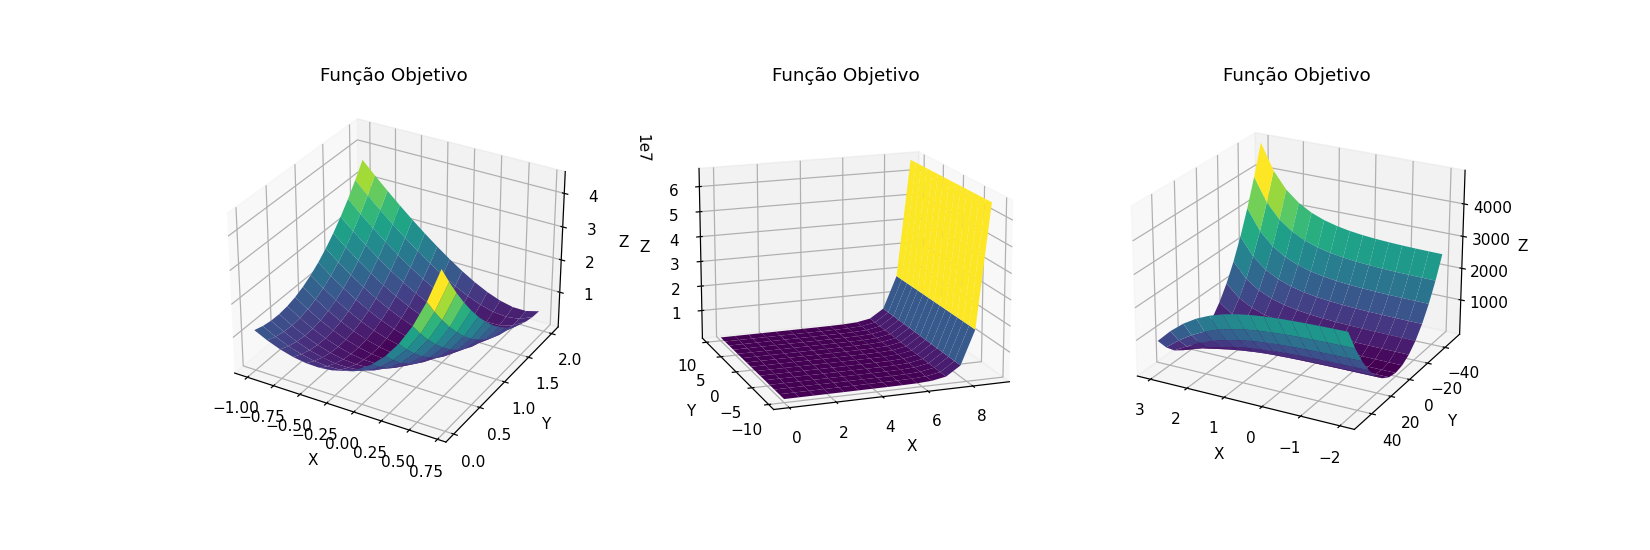

In [2]:
fig = plt.figure(figsize=(15,5))

# Fig1
ax = fig.add_subplot(1, 3, 1, projection='3d')

x = np.outer(np.linspace(-1, 0.7, 15), np.ones(15))
y = np.outer(np.linspace(0, 2, 15), np.ones(15)).T
z = x**2 + (np.exp(x) - y)**2
 
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Função Objetivo')

# Fig2
ax = fig.add_subplot(1, 3, 2, projection='3d')

x = np.outer(np.linspace(0, 9, 15), np.ones(15))
y = np.outer(np.linspace(-10, 10, 15), np.ones(15)).T
z = x**2 + (np.exp(x) - y)**2

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Função Objetivo')

# Fig3
ax = fig.add_subplot(1, 3, 3, projection='3d')

x = np.outer(np.linspace(-2, 3, 15), np.ones(15))
y = np.outer(np.linspace(-50, 50, 15), np.ones(15)).T
z = x**2 + (np.exp(x) - y)**2

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Função Objetivo')

plt.show()

## 2. Métodos e Critérios Utilizados

Os métodos de otimização implementados foram o Método de Newton, o Método do Gradiente, e os Métodos de Quase-Newton DFP e BFGS. Todos eles funcionam da mesma forma: é tomado um ponto $(x_0, y_0)$ inicial e, enquanto um determinado critério de parada não for satisfeito, em cada iteração $k$ o ponto atual $(x_k, y_k)$ vai sofrer um deslocamento $t_k$ em uma direção $d_k$, de forma que: $$(x_{k+1}, y_{k+1}) = (x_k, y_k) + t_kd_k$$

O passo $t_k$ foi obtido através da Busca de Armijo em todos os métodos, usando os parâmetros $\gamma = 0.8$ e $\eta = 0.25$.

A direção $d_k$ depende do método utilizado:

* Método do Gradiente: $d_k = - \nabla f(x,y)$

* Método de Newton: $d_k = - (\nabla^2 f(x,y))^{-1} \nabla f(x,y) $

* Métodos Quase-Newton: $d_k = - H_k\nabla f(x,y)$
    * $H_0 = I$
    
Com exceção do Método de Newton, o critério de parada escolhido foi $\nabla f(x,y) \approx 0$, com tolerância de $1 \times 10^{-6}$, junto a um limite de iterações em que $Nº\ de\ Passos \leq 500$. 

No Método de Newton o critério de parada escolhido foi $\frac{1}{2}\lambda^2(x, y) \approx 0 $, com tolerância de $1 \times 10^{-6}$, em que $\lambda(x, y) = (\nabla f(x,y)^T\nabla^2f(x,y)^{-1}\nabla f(x,y))^{\frac{1}{2}}$ é chamado **Decremento de Newton** e é uma estimativa da distância entre o ponto atual e o ponto ótimo. Além disso, foi usado um limite de iterações em que $Nº\ de\ Passos \leq 500$.

## 2. Teste e Análise com alguns Pontos Iniciais

Para testar os métodos e achar o mínimo da função, vamos analisar o comportamento dos modelos de otimização com cinco pontos iniciais distintos: 
* $P_1 = (0, 0)$
* $P_2 = (0, 2)$
* $P_3 = (4, 10)$
* $P_4 = (7, 4)$
* $P_5 = (9, -2)$

In [3]:
funcao = 'x**2 + (exp(x) - y)**2'
vars = ['x', 'y']

### 2.1. Ponto $P_1(x, y) = (0, 0)$

O ponto $(0, 0)$ está bem próximo do ponto mínimo de $f(x, y)$, então a convergência é muito rápida no Método de Newton, de forma que ele teve a melhor performance. 

Os outros métodos tiveram desempenho parecido entre si, com o Método BFGS tendo sido levemente mais rápido.

Todos os métodos foram capazes de convergir para o ponto ótimo $(x^*, y^*) = (0, 1)$.

In [4]:
p1 = (0,0)
teste1 = OtimizacaoNLP(funcao, vars, p1)

In [5]:
%%time
# Método do Gradiente
teste1.metodo_gradiente(verbose = True)


Começando Metodo do Gradiente com Ponto Inicial [[0]
 [0]], onde a F.O. vale 1.00000000

Passo Nº 1, Ponto Atual = [[-0.524288]
 [ 0.524288]], Valor da F.O.: 0.27945967

Passo Nº 2, Ponto Atual = [[-0.02844891]
 [ 0.59360123]], Valor da F.O.: 0.14395861

Passo Nº 3, Ponto Atual = [[-0.20633449]
 [ 0.79196597]], Valor da F.O.: 0.04304026

Passo Nº 4, Ponto Atual = [[-0.05169763]
 [ 0.80965654]], Valor da F.O.: 0.02226128

Passo Nº 5, Ponto Atual = [[-0.10491946]
 [ 0.90138035]], Valor da F.O.: 0.01100906

Passo Nº 6, Ponto Atual = [[-0.03557921]
 [ 0.90073593]], Valor da F.O.: 0.00540170

Passo Nº 7, Ponto Atual = [[-0.0572743 ]
 [ 0.95341898]], Valor da F.O.: 0.00336286

Passo Nº 8, Ponto Atual = [[-0.01411713]
 [ 0.9474657 ]], Valor da F.O.: 0.00168280

Passo Nº 9, Ponto Atual = [[-0.02975356]
 [ 0.97270778]], Valor da F.O.: 0.00088937

Passo Nº 10, Ponto Atual = [[-0.0089673 ]
 [ 0.97138195]], Valor da F.O.: 0.00046814

Passo Nº 11, Ponto Atual = [[-0.01587988]
 [ 0.98428653]], Valo

(matrix([[-0.0000078 ],
         [ 0.99997664]]),
 3.03048029824233e-10,
 34,
 200)

In [6]:
%%time
# Método de Newton
teste1.metodo_newton(verbose = True)


Começando Metodo de Newton com Ponto Inicial [[0]
 [0]], onde a F.O. vale 1.00000000

Passo Nº 1, Ponto Atual = [[-0.]
 [ 1.]], Valor da F.O.: 0.00000000

Passo Nº 2, Ponto Atual = [[-0.]
 [ 1.]], Valor da F.O.: 0.00000000

Finalizado em 2 passos, com Ponto Ótimo = [[-0.]
 [ 1.]] e Valor Ótimo da F.O.: 0.00000000 
Obtidos 0 pontos onde a direção era de subida.

CPU times: total: 46.9 ms
Wall time: 50.9 ms


(matrix([[-0.],
         [ 1.]]),
 3.08148791101958e-33,
 2,
 2)

In [7]:
%%time
# Método DFP
teste1.metodo_dfp(verbose = True)


Começando Metodo DFP com Ponto Inicial [[0]
 [0]], onde a F.O. vale 1.00000000

Passo Nº 1, Ponto Atual = [[-0.524288]
 [ 0.524288]], Valor da F.O.: 0.27945967

Passo Nº 2, Ponto Atual = [[-0.02844891]
 [ 0.59360123]], Valor da F.O.: 0.14395861

Passo Nº 3, Ponto Atual = [[-0.20633449]
 [ 0.79196597]], Valor da F.O.: 0.04304026

Passo Nº 4, Ponto Atual = [[-0.05169763]
 [ 0.80965654]], Valor da F.O.: 0.02226128

Passo Nº 5, Ponto Atual = [[-0.10491946]
 [ 0.90138035]], Valor da F.O.: 0.01100906

Passo Nº 6, Ponto Atual = [[-0.03557921]
 [ 0.90073593]], Valor da F.O.: 0.00540170

Passo Nº 7, Ponto Atual = [[-0.0572743 ]
 [ 0.95341898]], Valor da F.O.: 0.00336286

Passo Nº 8, Ponto Atual = [[-0.01411713]
 [ 0.9474657 ]], Valor da F.O.: 0.00168280

Passo Nº 9, Ponto Atual = [[-0.02975356]
 [ 0.97270778]], Valor da F.O.: 0.00088937

Passo Nº 10, Ponto Atual = [[-0.0089673 ]
 [ 0.97138195]], Valor da F.O.: 0.00046814

Passo Nº 11, Ponto Atual = [[-0.01587988]
 [ 0.98428653]], Valor da F.O.

(matrix([[-0.0000078 ],
         [ 0.99997664]]),
 3.03048029823905e-10,
 34,
 200)

In [8]:
%%time
# Método BFGS
teste1.metodo_bfgs(verbose = True)


Começando Metodo BFGS com Ponto Inicial [[0]
 [0]], onde a F.O. vale 1.00000000

Passo Nº 1, Ponto Atual = [[-0.524288]
 [ 0.524288]], Valor da F.O.: 0.27945967

Passo Nº 2, Ponto Atual = [[-0.06785894]
 [ 0.63949637]], Valor da F.O.: 0.09156843

Passo Nº 3, Ponto Atual = [[-0.18600041]
 [ 0.85072927]], Valor da F.O.: 0.03501460

Passo Nº 4, Ponto Atual = [[-0.00803726]
 [ 0.88225844]], Valor da F.O.: 0.01210670

Passo Nº 5, Ponto Atual = [[-0.05903979]
 [ 0.94164859]], Valor da F.O.: 0.00348674

Passo Nº 6, Ponto Atual = [[-0.00539725]
 [ 0.95789828]], Valor da F.O.: 0.00137742

Passo Nº 7, Ponto Atual = [[-0.02052607]
 [ 0.9783388 ]], Valor da F.O.: 0.00042313

Passo Nº 8, Ponto Atual = [[-0.00246741]
 [ 0.98468968]], Valor da F.O.: 0.00017111

Passo Nº 9, Ponto Atual = [[-0.0085826 ]
 [ 0.99377416]], Valor da F.O.: 0.00007904

Passo Nº 10, Ponto Atual = [[-0.00105134]
 [ 0.99438333]], Valor da F.O.: 0.00002195

Passo Nº 11, Ponto Atual = [[-0.00307001]
 [ 0.9976571 ]], Valor da F.O

(matrix([[-0.00000022],
         [ 0.99999508]]),
 2.21043830616147e-11,
 24,
 153)

### 2.2. Ponto $P_2(x, y) = (0, 2)$

O ponto $(0, 2)$ falha no método de Newton pois a matriz hessiana da função nesse ponto tem determinante zero, ou seja, é singular; portanto, não é possível obter o inverso da hessiana, parte fundamental do método. 

Os outros métodos não tem esse problema, pois não se utilizam da hessiana, e convergiram rapidamente. O Método BFGS foi levemente mais rápido que os outros. 

Com exceção do Método de Newton, os outros métodos foram capazes de convergir para o ponto ótimo $(x^*, y^*) = (0, 1)$.

In [9]:
p2 = (0, 2)
teste2 = OtimizacaoNLP(funcao, vars, p2)
fo_inicio2 = teste2.calcular_func()

In [10]:
%%time
# Método do Gradiente
p_ot21, valorf21, passos21, ch_arm21 = teste2.metodo_gradiente()
print(f"Método do Gradiente\n\nPonto Inicial: {p2}\n"
      f"Valor Inicial da FO: {fo_inicio2:.8f}\n")
print(f"Ponto Ótimo: {p_ot21}\nValor da FO: {valorf21:.8f}\n"
    f"Nº de Passos: {passos21}\nNº chamadas Armijo: {ch_arm21}\n")

Método do Gradiente

Ponto Inicial: (0, 2)
Valor Inicial da FO: 1.00000000

Ponto Ótimo: [[0.00000414]
 [1.00001226]]
Valor da FO: 0.00000000
Nº de Passos: 40
Nº chamadas Armijo: 244

CPU times: total: 1.03 s
Wall time: 1.02 s


In [37]:
%%time
# Método de Newton
p_ot22, valorf22, passos22, ch_arm22 = teste2.metodo_newton(verbose = True)
print(f"Método de Newton\n\nPonto Inicial: {p2}\n"
      f"Valor Inicial da FO: {fo_inicio2:.8f}\n")
print(f"Ponto Ótimo: {p_ot22}\nValor da FO: {valorf22:.8f}\n"
    f"Nº de Passos: {passos22}\nNº chamadas Armijo: {ch_arm22}\n")


Começando Metodo de Newton com Ponto Inicial [[0]
 [2]], onde a F.O. vale 1.00000000

Erro: A matriz Hessiana não é inversível.



LinAlgError: Singular matrix

In [12]:
%%time
# Método DFP
p_ot23, valorf23, passos23, ch_arm23 = teste2.metodo_dfp()
print(f"Método DFP\n\nPonto Inicial: {p2}\n"
      f"Valor Inicial da FO: {fo_inicio2:.8f}\n")
print(f"Ponto Ótimo: {p_ot23}\nValor da FO: {valorf23:.8f}\n"
    f"Nº de Passos: {passos23}\nNº chamadas Armijo: {ch_arm23}\n")

Método DFP

Ponto Inicial: (0, 2)
Valor Inicial da FO: 1.00000000

Ponto Ótimo: [[0.00000414]
 [1.00001226]]
Valor da FO: 0.00000000
Nº de Passos: 40
Nº chamadas Armijo: 244

CPU times: total: 1.14 s
Wall time: 1.15 s


In [13]:
%%time
# Método BFGS
p_ot24, valorf24, passos24, ch_arm24 = teste2.metodo_bfgs()
print(f"Método BFGS\n\nPonto Inicial: {p2}\n"
      f"Valor Inicial da FO: {fo_inicio2:.8f}\n")
print(f"Ponto Ótimo: {p_ot24}\nValor da FO: {valorf24:.8f}\n"
    f"Nº de Passos: {passos24}\nNº chamadas Armijo: {ch_arm24}\n")

Método BFGS

Ponto Inicial: (0, 2)
Valor Inicial da FO: 1.00000000

Ponto Ótimo: [[0.00000029]
 [1.00000128]]
Valor da FO: 0.00000000
Nº de Passos: 28
Nº chamadas Armijo: 186

CPU times: total: 812 ms
Wall time: 832 ms


### 2.3. Ponto $P_3(x, y) = (4, 10)$

No ponto $(4, 10)$, observa-se que o Método do Gradiente é extremamente lento. O valor da Função Objetivo decresce, mas muito devagar, extrapolando o número de passos permitindo antes de atingir a convergência no ponto mínimo. Isso acontece porque os autovalores da matriz hessiana $\nabla^2 f(x,y)$ nesse ponto são tais que $\lambda_1 << \lambda_2$, situação em que as curvas de nível de $f(x, y)$ são elipsóides excêntricos, ou seja, curvas muito achatadas, o que faz com que a convergência ocorra de forma muito lenta. 
De fato,  $\lambda_1 \approx 0.89$ e $\lambda_2 \approx 10835.00$. [[2]](https://www.wolframalpha.com/input?i=%282-l%29%282+%2B+4e%5E%282x%29+-+2y*%28e%5Ex%29+-+l%29++-+4*e%5E%282x%29+%3D+0%2C+x+%3D+4%2C+y+%3D10)

O mesmo problema acontece com os Métodos DFP e BFGS, que também sofrem de convergência muito lenta e extrapolam o número máximo de passos.

O Método de Newton, por outro lado, tem um ótimo desempenho, convergindo para o ponto ótimo rapidamente.

Apenas o Método de Newton foi capaz de convergir para o ponto ótimo $(x^*, y^*) = (0, 1)$.

In [14]:
p3 = (4, 10)
teste3 = OtimizacaoNLP(funcao, vars, p3)
fo_inicio3 = teste3.calcular_func()

In [15]:
%%time
# Método do Gradiente
p_ot31, valorf31, passos31, ch_arm31 = teste3.metodo_gradiente()
print(f"Método do Gradiente\n\nPonto Inicial: {p3}\n"
      f"Valor Inicial da FO: {fo_inicio3:.8f}\n")
print(f"Ponto Ótimo: {p_ot31}\nValor da FO: {valorf31:.8f}\n"
    f"Nº de Passos: {passos31}\nNº chamadas Armijo: {ch_arm31}\n")

Método do Gradiente

Ponto Inicial: (4, 10)
Valor Inicial da FO: 2004.99498638

Ponto Ótimo: [[1.67470292]
 [5.71446538]]
Valor da FO: 2.94695199
Nº de Passos: 500
Nº chamadas Armijo: 9840

CPU times: total: 40.9 s
Wall time: 41.1 s


In [16]:
%%time
# Método de Newton
p_ot32, valorf32, passos32, ch_arm32 = teste3.metodo_newton()
print(f"Método de Newton\n\nPonto Inicial: {p3}\n"
      f"Valor Inicial da FO: {fo_inicio3:.8f}\n")
print(f"Ponto Ótimo: {p_ot32}\nValor da FO: {valorf32:.8f}\n"
    f"Nº de Passos: {passos32}\nNº chamadas Armijo: {ch_arm32}\n")

Método de Newton

Ponto Inicial: (4, 10)
Valor Inicial da FO: 2004.99498638

Ponto Ótimo: [[0.]
 [1.]]
Valor da FO: 0.00000000
Nº de Passos: 18
Nº chamadas Armijo: 45

CPU times: total: 438 ms
Wall time: 459 ms


In [17]:
%%time
# Método DFP
p_ot33, valorf33, passos33, ch_arm33 = teste3.metodo_dfp()
print(f"Método DFP\n\nPonto Inicial: {p3}\n"
      f"Valor Inicial da FO: {fo_inicio3:.8f}\n")
print(f"Ponto Ótimo: {p_ot33}\nValor da FO: {valorf33:.8f}\n"
    f"Nº de Passos: {passos33}\nNº chamadas Armijo: {ch_arm33}\n")

Método DFP

Ponto Inicial: (4, 10)
Valor Inicial da FO: 2004.99498638

Ponto Ótimo: [[1.67470292]
 [5.71446538]]
Valor da FO: 2.94695199
Nº de Passos: 500
Nº chamadas Armijo: 9840

CPU times: total: 39.6 s
Wall time: 39.7 s


In [18]:
%%time
# Método BFGS
p_ot34, valorf34, passos34, ch_arm34 = teste3.metodo_bfgs()
print(f"Método BFGS\n\nPonto Inicial: {p3}\n"
      f"Valor Inicial da FO: {fo_inicio3:.8f}\n")
print(f"Ponto Ótimo: {p_ot34}\nValor da FO: {valorf34:.8f}\n"
    f"Nº de Passos: {passos34}\nNº chamadas Armijo: {ch_arm34}\n")

Método BFGS

Ponto Inicial: (4, 10)
Valor Inicial da FO: 2004.99498638

Ponto Ótimo: [[2.07547003]
 [8.27880296]]
Valor da FO: 4.40399357
Nº de Passos: 500
Nº chamadas Armijo: 13357

CPU times: total: 53.7 s
Wall time: 54.6 s


### 2.4. Ponto $P_4(x, y) = (7, 4)$

O ponto $(7, 4)$ está localizado onde a função $f(x, y)$ dispara, onde $x$ é muito positivo. Nesse ponto, a função objetivo vale mais de $1 \times 10^{6}$ e está bem longe do ótimo. 

Assim, apesar do Método de Newton ter tido o melhor desempenho com relação a tempo de execução na CPU, nota-se que foram necessários bem mais passos do que antes para a convergência.

O Método BFGS se saiu consideravelmente pior que os outros, precisando de mais de 300 passos até a convergência e demorando para convergir, visto o número muito grande de chamadas de Armijo. 

Apesar disso, todos os métodos foram capazes de convergir para o ponto ótimo $(x^*, y^*) = (0, 1)$.

In [19]:
p4 = (7, 4)
teste4 = OtimizacaoNLP(funcao, vars, p4)
fo_inicio4 = teste4.calcular_func()

In [20]:
%%time
# Método do Gradiente
p_ot41, valorf41, passos41, ch_arm41 = teste4.metodo_gradiente()
print(f"Método do Gradiente\n\nPonto Inicial: {p4}\n"
      f"Valor Inicial da FO: {fo_inicio4:.8f}\n")
print(f"Ponto Ótimo: {p_ot41}\nValor da FO: {valorf41:.8f}\n"
    f"Nº de Passos: {passos41}\nNº chamadas Armijo: {ch_arm41}\n")

Método do Gradiente

Ponto Inicial: (7, 4)
Valor Inicial da FO: 1193896.21889735

Ponto Ótimo: [[0.00000167]
 [1.00000498]]
Valor da FO: 0.00000000
Nº de Passos: 78
Nº chamadas Armijo: 753

CPU times: total: 2.84 s
Wall time: 2.89 s


In [21]:
%%time
# Método de Newton
p_ot42, valorf42, passos42, ch_arm42 = teste4.metodo_newton()
print(f"Método de Newton\n\nPonto Inicial: {p4}\n"
      f"Valor Inicial da FO: {fo_inicio4:.8f}\n")
print(f"Ponto Ótimo: {p_ot42}\nValor da FO: {valorf42:.8f}\n"
    f"Nº de Passos: {passos42}\nNº chamadas Armijo: {ch_arm42}\n")

Método de Newton

Ponto Inicial: (7, 4)
Valor Inicial da FO: 1193896.21889735

Ponto Ótimo: [[0.]
 [1.]]
Valor da FO: 0.00000000
Nº de Passos: 85
Nº chamadas Armijo: 243

CPU times: total: 2 s
Wall time: 2.01 s


In [22]:
%%time
# Método DFP
p_ot43, valorf43, passos43, ch_arm43 = teste4.metodo_dfp()
print(f"Método DFP\n\nPonto Inicial: {p4}\n"
      f"Valor Inicial da FO: {fo_inicio4:.8f}\n")
print(f"Ponto Ótimo: {p_ot43}\nValor da FO: {valorf43:.8f}\n"
    f"Nº de Passos: {passos43}\nNº chamadas Armijo: {ch_arm43}\n")

Método DFP

Ponto Inicial: (7, 4)
Valor Inicial da FO: 1193896.21889735

Ponto Ótimo: [[0.00000167]
 [1.00000498]]
Valor da FO: 0.00000000
Nº de Passos: 78
Nº chamadas Armijo: 753

CPU times: total: 2.73 s
Wall time: 2.74 s


In [23]:
%%time
# Método BFGS
p_ot44, valorf44, passos44, ch_arm44 = teste4.metodo_bfgs()
print(f"Método BFGS\n\nPonto Inicial: {p4}\n"
      f"Valor Inicial da FO: {fo_inicio4:.8f}\n")
print(f"Ponto Ótimo: {p_ot44}\nValor da FO: {valorf44:.8f}\n"
    f"Nº de Passos: {passos44}\nNº chamadas Armijo: {ch_arm44}\n")

Método BFGS

Ponto Inicial: (7, 4)
Valor Inicial da FO: 1193896.21889735

Ponto Ótimo: [[0.00000007]
 [0.99999948]]
Valor da FO: 0.00000000
Nº de Passos: 371
Nº chamadas Armijo: 8499

CPU times: total: 25.9 s
Wall time: 26.1 s


### 2.5. Ponto $P_5(x, y) = (9, -2)$

O ponto $(9, -2)$ está localizado onde a função $f(x, y)$ está crescendo ainda mais rapidamente que antes. Nesse ponto, a função objetivo vale mais de $65 \times 10^{6}$ e está muito longe do ótimo. Isso agravou a situação vista no ponto anterior.

Assim, o Método de Newton não se sai tão bem, precisando de mais de 270 passos para a convergência.

O Método BFGS teve um desempenho bem ruim, estourando o número máximo de passos e conseguindo convergir para um ponto próximo, mas não ótimo. Cada passo teve um alto custo de tempo devido a muitas chamadas de Armijo. 

Já o Método do Gradiente e o Método DFP se saem muito bem, convergindo em poucos passos para o padrão desses métodos.

Além do Método BFGS, os outros métodos foram capazes de convergir para o ponto ótimo $(x^*, y^*) = (0, 1)$. O Método BFGS conseguiu um ponto próximo ao ótimo, mas não ideal.

In [24]:
p5 = (9, -2)
teste5 = OtimizacaoNLP(funcao, vars, p5)
fo_inicio5 = teste5.calcular_func()

In [25]:
%%time
# Método do Gradiente
p_ot51, valorf51, passos51, ch_arm51 = teste5.metodo_gradiente()
print(f"Método do Gradiente\n\nPonto Inicial: {p5}\n"
      f"Valor Inicial da FO: {fo_inicio5:.8f}\n")
print(f"Ponto Ótimo: {p_ot51}\nValor da FO: {valorf51:.8f}\n"
    f"Nº de Passos: {passos51}\nNº chamadas Armijo: {ch_arm51}\n")

Método do Gradiente

Ponto Inicial: (9, -2)
Valor Inicial da FO: 65692466.47304080

Ponto Ótimo: [[-0.00000587]
 [ 0.99998236]]
Valor da FO: 0.00000000
Nº de Passos: 41
Nº chamadas Armijo: 466

CPU times: total: 1.41 s
Wall time: 1.4 s


In [26]:
%%time
# Método de Newton
p_ot52, valorf52, passos52, ch_arm52 = teste5.metodo_newton()
print(f"Método de Newton\n\nPonto Inicial: {p5}\n"
      f"Valor Inicial da FO: {fo_inicio5:.8f}\n")
print(f"Ponto Ótimo: {p_ot52}\nValor da FO: {valorf52:.8f}\n"
    f"Nº de Passos: {passos52}\nNº chamadas Armijo: {ch_arm52}\n")

Método de Newton

Ponto Inicial: (9, -2)
Valor Inicial da FO: 65692466.47304080

Ponto Ótimo: [[0.]
 [1.]]
Valor da FO: 0.00000000
Nº de Passos: 278
Nº chamadas Armijo: 814

CPU times: total: 6.62 s
Wall time: 6.66 s


In [27]:
%%time
# Método DFP
p_ot53, valorf53, passos53, ch_arm53 = teste5.metodo_dfp()
print(f"Método DFP\n\nPonto Inicial: {p5}\n"
      f"Valor Inicial da FO: {fo_inicio5:.8f}\n")
print(f"Ponto Ótimo: {p_ot53}\nValor da FO: {valorf53:.8f}\n"
    f"Nº de Passos: {passos53}\nNº chamadas Armijo: {ch_arm53}\n")

Método DFP

Ponto Inicial: (9, -2)
Valor Inicial da FO: 65692466.47304080

Ponto Ótimo: [[-0.00000587]
 [ 0.99998236]]
Valor da FO: 0.00000000
Nº de Passos: 41
Nº chamadas Armijo: 466

CPU times: total: 1.33 s
Wall time: 1.32 s


In [28]:
%%time
# Método BFGS
p_ot54, valorf54, passos54, ch_arm54 = teste5.metodo_bfgs()
print(f"Método BFGS\n\nPonto Inicial: {p5}\n"
      f"Valor Inicial da FO: {fo_inicio5:.8f}\n")
print(f"Ponto Ótimo: {p_ot54}\nValor da FO: {valorf54:.8f}\n"
    f"Nº de Passos: {passos54}\nNº chamadas Armijo: {ch_arm54}\n")

Método BFGS

Ponto Inicial: (9, -2)
Valor Inicial da FO: 65692466.47304080

Ponto Ótimo: [[0.01104176]
 [1.34986751]]
Valor da FO: 0.11488335
Nº de Passos: 500
Nº chamadas Armijo: 18693

CPU times: total: 56.1 s
Wall time: 57.1 s


### 2.6. Ponto extra $P_*(x, y) = (30, -40)$

O ponto $(30, -40)$ falha no método de Newton, convergindo para um ponto muito distante do ótimo. Observa-se que, ao fim do primeiro passo do método, obtém-se aproximadamente o ponto $(30, 1.068 \times 10^{13})$. Nesse ponto, temos que $\nabla f(x,y)^{T}d > 0$, o que significa que a direção é de subida, e portanto o método falha. 

O Método do Gradiente, no entanto, consegue convergir normalmente.

Obs: Os Métodos BFGS e DFP não funcionaram, pois os valores obtidos durante os cálculos extrapolaram os limites que os vetores numpy conseguem suportar. 

In [29]:
p6 = (30, -40)
teste6 = OtimizacaoNLP(funcao, vars, p6)
fo_inicio6 = teste6.calcular_func()

In [30]:
%%time
# Método do Gradiente
p_ot61, valorf61, passos61, ch_arm61 = teste6.metodo_gradiente()
print(f"Método do Gradiente\n\nPonto Inicial: {p6}\n"
      f"Valor Inicial da FO: {fo_inicio6:.8f}\n")
print(f"Ponto Ótimo: {p_ot61}\nValor da FO: {valorf61:.8f}\n"
    f"Nº de Passos: {passos61}\nNº chamadas Armijo: {ch_arm61}\n")

Método do Gradiente

Ponto Inicial: (30, -40)
Valor Inicial da FO: 114200738982423000000000000.00000000

Ponto Ótimo: [[-0.0000008 ]
 [ 0.99999743]]
Valor da FO: 0.00000000
Nº de Passos: 58
Nº chamadas Armijo: 2632

CPU times: total: 7.47 s
Wall time: 7.67 s


In [31]:
# Método de Newton
teste6.metodo_newton(verbose = True)


Começando Metodo de Newton com Ponto Inicial [[ 30]
 [-40]], onde a F.O. vale 114200738982423000000000000.00000000

Passo Nº 1, Ponto Atual = [[3.00000000e+01]
 [1.06864746e+13]], Valor da F.O.: 900.00000563


Passo Nº 2, Ponto Atual = [[3.00000035e+01]
 [1.06865124e+13]], Valor da F.O.: 5397.52528433

Finalizado em 2 passos, com Ponto Ótimo = [[3.00000035e+01]
 [1.06865124e+13]] e Valor Ótimo da F.O.: 5397.52528433 
Obtidos 1 pontos onde a direção era de subida.



(matrix([[3.00000035e+01],
         [1.06865124e+13]]),
 5397.52528433472,
 2,
 46)

## 3. Tabela com os Resultados 

Abaixo estão as tabelas com os resultados obtidos considerando os pontos iniciais estudados para cada método.

In [32]:
p_inicial_l = [[0, 0], [0, 2], [4, 10], [7, 4], [9, -2]]
p_otimo_l, f_otimo_l, f_otimo_l, n_passos_l, n_armijo_l, erro_l, tempo_l = [], [], [], [], [], [], []
metodos = ['metodo_newton', 'metodo_gradiente', 'metodo_dfp', 'metodo_bfgs']

for metodo in metodos:
    for p_inicial in p_inicial_l:
        teste = OtimizacaoNLP(funcao, vars, p_inicial)
        try:
            t = time.process_time()
            p_otimo, f_otimo, n_passos, n_armijo = getattr(teste, metodo)()
            elapsed = time.process_time() - t
        except Exception:
            p_otimo_l += ['NA']
            f_otimo_l += ['NA']
            n_passos_l += ['NA']
            n_armijo_l += ['NA']
            erro_l += ['NA']
            tempo_l += ['NA']
        else:
            p_1, p_2 = p_otimo.T.tolist()[0]
            p_otimo_l += [f'[{p_1:.6f}, {p_2:.6f}]']
            f_otimo_l += [float(f_otimo)]
            n_passos_l += [n_passos]
            n_armijo_l += [n_armijo]
            erro_l += [f'{abs(0 - f_otimo):.6E}']
            tempo_l += [float(elapsed)]

In [33]:
# Método de Newton
df1 = pd.DataFrame({'Ponto Inicial': p_inicial_l[:5], 'Nº de Passos': n_passos_l[:5],
                  'Nº Ch. Armijo': n_armijo_l[:5], 'Ponto Ótimo': p_otimo_l[:5], 'Valor Ótimo': f_otimo_l[:5], 
                    'Erro de Aproximação': erro_l[:5], 'Tempo de CPU': tempo_l[:5]})
df1 = df1.style.set_caption('Resultados Computacionais pelo Método de Newton').set_table_styles([{'selector': 'caption',
    'props': [('text-align', 'center'), ('color', 'black'), ('font-size', '16px')]}]).format(precision = 6)
df1

,Ponto Inicial,Nº de Passos,Nº Ch. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação,Tempo de CPU
0,"[0, 0]",2,2,"[-0.000000, 1.000000]",0.000000,3.081488E-33,0.031250
1,"[0, 2]",NA,NA,NA,NA,NA,NA
2,"[4, 10]",18,45,"[0.000000, 1.000000]",0.000000,1.593902E-22,0.421875
3,"[7, 4]",85,243,"[0.000000, 1.000000]",0.000000,2.272360E-22,2.187500
4,"[9, -2]",278,814,"[0.000000, 1.000000]",0.000000,6.474633E-25,7.218750


In [34]:
# Método do Gradiente
df2 = pd.DataFrame({'Ponto Inicial': p_inicial_l, 'Nº de Passos': n_passos_l[5:10],
                  'Nº Ch. Armijo': n_armijo_l[5:10], 'Ponto Ótimo': p_otimo_l[5:10], 'Valor Ótimo': f_otimo_l[5:10], 
                    'Erro de Aproximação': erro_l[5:10], 'Tempo de CPU': tempo_l[5:10]})
df2 = df2.style.set_caption('Resultados Computacionais pelo Método do Gradiente').set_table_styles([{'selector': 'caption',
    'props': [('text-align', 'center'), ('color', 'black'), ('font-size', '16px')]}]).format(precision = 6)
df2

,Ponto Inicial,Nº de Passos,Nº Ch. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação,Tempo de CPU
0,"[0, 0]",34,200,"[-0.000008, 0.999977]",0.000000,3.030480E-10,0.656250
1,"[0, 2]",40,244,"[0.000004, 1.000012]",0.000000,8.306732E-11,0.953125
2,"[4, 10]",500,9840,"[1.674703, 5.714465]",2.946952,2.946952E+0,40.296875
3,"[7, 4]",78,753,"[0.000002, 1.000005]",0.000000,1.376175E-11,2.984375
4,"[9, -2]",41,466,"[-0.000006, 0.999982]",0.000000,1.729456E-10,1.281250


In [35]:
# Método DFP
df3 = pd.DataFrame({'Ponto Inicial': p_inicial_l, 'Nº de Passos': n_passos_l[10:15],
                  'Nº Ch. Armijo': n_armijo_l[10:15], 'Ponto Ótimo': p_otimo_l[10:15], 'Valor Ótimo': f_otimo_l[10:15], 
                    'Erro de Aproximação': erro_l[10:15], 'Tempo de CPU': tempo_l[10:15]})
df3 = df3.style.set_caption('Resultados Computacionais pelo Método DFP').set_table_styles([{'selector': 'caption',
    'props': [('text-align', 'center'), ('color', 'black'), ('font-size', '16px')]}]).format(precision = 6)
df3

,Ponto Inicial,Nº de Passos,Nº Ch. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação,Tempo de CPU
0,"[0, 0]",34,200,"[-0.000008, 0.999977]",0.000000,3.030480E-10,0.750000
1,"[0, 2]",40,244,"[0.000004, 1.000012]",0.000000,8.306732E-11,1.000000
2,"[4, 10]",500,9840,"[1.674703, 5.714465]",2.946952,2.946952E+0,41.281250
3,"[7, 4]",78,753,"[0.000002, 1.000005]",0.000000,1.376175E-11,3.390625
4,"[9, -2]",41,466,"[-0.000006, 0.999982]",0.000000,1.729457E-10,1.531250


In [36]:
# Método BFGS
df4 = pd.DataFrame({'Ponto Inicial': p_inicial_l, 'Nº de Passos': n_passos_l[15:20],
                  'Nº Ch. Armijo': n_armijo_l[15:20], 'Ponto Ótimo': p_otimo_l[15:20], 'Valor Ótimo': f_otimo_l[15:20], 
                    'Erro de Aproximação': erro_l[15:20], 'Tempo de CPU': tempo_l[15:20]})
df4 = df4.style.set_caption('Resultados Computacionais pelo Método BFGS').set_table_styles([{'selector': 'caption',
    'props': [('text-align', 'center'), ('color', 'black'), ('font-size', '16px')]}]).format(precision = 6)
df4

,Ponto Inicial,Nº de Passos,Nº Ch. Armijo,Ponto Ótimo,Valor Ótimo,Erro de Aproximação,Tempo de CPU
0,"[0, 0]",24,153,"[-0.000000, 0.999995]",0.000000,2.210438E-11,0.593750
1,"[0, 2]",28,186,"[0.000000, 1.000001]",0.000000,1.055432E-12,0.703125
2,"[4, 10]",500,13357,"[2.075470, 8.278803]",4.403994,4.403994E+0,53.734375
3,"[7, 4]",371,8499,"[0.000000, 0.999999]",0.000000,3.548834E-13,26.015625
4,"[9, -2]",500,18693,"[0.011042, 1.349868]",0.114883,1.148834E-1,54.453125


## 4. Conclusões

Com isso, é possível concluir que:
1. O Método de Newton funciona de forma excelente para pontos iniciais próximos ao ponto ótimo. No entanto, para pontos muito distantes do ótimo seu tempo de convergência pode aumentar consideravelmente.
2. O Método de Newton possui limitações: ele não funciona quando a matriz hessiana no ponto estudado é singular; além disso, ele não garante que a direção será de descida. Em ambos os casos, o método falha.
3. O Método do Gradiente fica extremamente lento quando os autovalores $\lambda_1$ e $\lambda_2$ da hessiana estão muito distantes entre si.
4. O Método BFGS parece não ser muito eficiente em regiões onde a função objetivo está crescendo muito rápido, tendo um desempenho muito pior que o do Método de Newton nessas situações. Nesses casos, ele faz muitas chamadas de Armijo a cada iteração, o que torna o passo $t_k$ muito pequeno e a convergência bem devagar. Esse número alto de chamadas de Armijo é um fator que também aumenta o tempo de execução.
5. Mesmo em situações não ideais, o Método de Newton parece não precisar de muitas chamadas de Armijo, o que, apesar do fato da operação de inversão de matriz que faz parte do método ser custosa, torna as iterações do Método de Newton na prática visivelmente mais rápidas que as dos outros métodos grande parte das vezes.
6. O Método DFP teve um desempenho extremamente semelhante ao Método do Gradiente em todos os pontos.